In [1]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
import itertools

from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import dataset
BC_df = pd.read_csv('Breast_cancer.csv')
BC_df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [3]:
#Task 1.1: Check the dimension of your dataset
print("Cancer data set dimensions : {}".format(BC_df.shape))

Cancer data set dimensions : (569, 32)


In [4]:
#Task 1.3: Check for missing or Null Data points
BC_df.isnull().sum()
BC_df.isna().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [5]:
# Task 1.3: show summary statistics
print(BC_df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

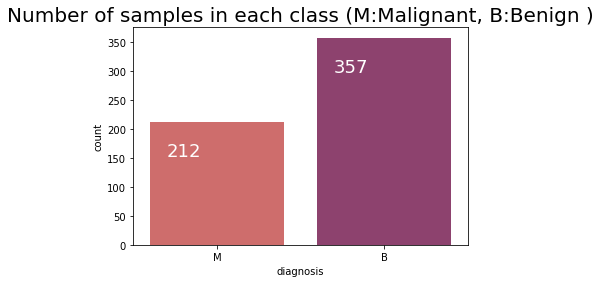

In [6]:
# Task 1.4: counting values of variables in 'diagnosis'
ax = sns.countplot(x="diagnosis", data=BC_df, palette="flare")
ax.set_title('Number of samples in each class (M:Malignant, B:Benign )', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

In [7]:
"""
-We can observe that the data set contain 569 rows and 32 columns. 
‘Diagnosis’ is the column which we are going to predict: the cancer is M = malignant or B = benign. 1 means the cancer is malignant and 0 means benign.
-We can see that values vary with different means and standard deviations, perhaps some normalization or standardization 
    would be required prior to modeling.    
-We can identify that out of the 569 persons, 357 are labeled as B (benign) and 212 as M (malignant): imbalanced data
"""

'\n-We can observe that the data set contain 569 rows and 32 columns. \n‘Diagnosis’ is the column which we are going to predict: the cancer is M = malignant or B = benign. 1 means the cancer is malignant and 0 means benign.\n-We can see that values vary with different means and standard deviations, perhaps some normalization or standardization \n    would be required prior to modeling.    \n-We can identify that out of the 569 persons, 357 are labeled as B (benign) and 212 as M (malignant): imbalanced data\n'

In [28]:
# Task 1.5: Set the input (X) and output/target (y) 
X = BC_df.iloc[:, 1:31].values 
y = BC_df.iloc[:, 31].values
X.shape


(569, 30)

In [29]:
y.shape

(569,)

In [8]:
#2.1 Handling Target Categorical Value via Encoding
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [9]:
#Task 3.2 Sacle data
sc = StandardScaler()
X = sc.fit_transform(X)
class_names=[0,1]

In [10]:
#Task 3.1: Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=3)

#print("X_train set dimensions : {}".format(X_train.shape))
#print("X_test set dimensions : {}".format(X_test.shape))
#print("y_train set dimensions : {}".format(y_train.shape))
print("y_test set dimensions : {}".format(y_test.shape))

y_test set dimensions : (171,)


In [22]:
# Task 4.1 and 4.2: Build the Model and fit to train set
mlp = MLPClassifier(
    max_iter=200,
    alpha=0.1,
    activation='logistic',
    solver='adam')
mlp.fit(X_train, y_train)
mlp_predict = mlp.predict(X_test)
#mlp_predict_proba = mlp.predict_proba(X_test)[:, 1]


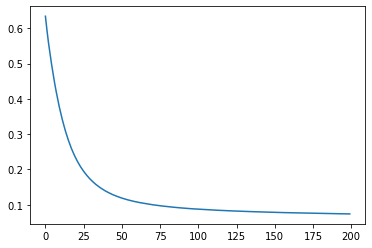

In [23]:
# Task 4.3: Adjust the Configuration 
loss_values = mlp.loss_curve_
plt.plot(loss_values)
plt.show()

In [21]:
#Task 5
print('MLP Accuracy: {:.2f}%'.format(accuracy_score(y_test, mlp_predict) * 100))
print('MLP Classification report:\n\n', classification_report(y_test, mlp_predict))
print('MLP Training set score: {:.2f}%'.format(mlp.score(X_train, y_train) * 100))
print('MLP Testing set score: {:.2f}%'.format(mlp.score(X_test, y_test) * 100))

MLP Accuracy: 98.21%
MLP Classification report:

               precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.95      1.00      0.98        21

    accuracy                           0.98        56
   macro avg       0.98      0.99      0.98        56
weighted avg       0.98      0.98      0.98        56

MLP Training set score: 98.64%
MLP Testing set score: 98.21%


<AxesSubplot:>

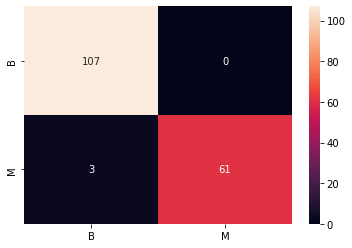

In [17]:
# Task 6: Confusion Matrix for MLPClassifier using train test split
outcome_labels = sorted(BC_df.diagnosis.unique())
sns.heatmap(
    confusion_matrix(y_test, mlp_predict),
    annot=True,
    fmt="d",
    xticklabels=outcome_labels,
    yticklabels=outcome_labels
)

In [18]:
# Task 7: prepare kfold cross validation
kfold = StratifiedKFold(10,random_state=1, shuffle=True)
# enumerate splits
scores = list()
predicted_targets = np.array([])
actual_targets = np.array([])
mlp_predict_proba= np.array([])
mlp_predict = np.array([])
X_test=np.array([])
for train_ix, test_ix in kfold.split(X, y):
    # split data
    X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
    # fit the model
    mlp.fit(X_train, y_train)
    # predict test set
   # mlp_predict = np.append(mlp_predict,mlp.predict(X_test))
    
    mlp_predict = mlp.predict(X_test)
    #mlp_predict_proba =  np.append(mlp_predict_proba,mlp.predict_proba(X_test)[:, 1])
    predicted_targets = np.append(predicted_targets, mlp_predict)
    actual_targets = np.append(actual_targets, y_test)
    '''
      # evaluate on train
    score_train = mlp.score(X_train, y_train)
    print('>%.3f' % score_train)
    scores.append(score_train)
    '''     
    # evaluate on predictions
    score_test = accuracy_score(y_test, mlp_predict)
    print('score_test: %.3f' % score_test)
    X_test.shape
    scores.append(score_test)

# summarize all scores
print('MLP Accuracy: {:.2f}%'.format(accuracy_score(actual_targets, predicted_targets) * 100))
#print('Mean Testing set Accuracy: %.3f (%.3f)' % (mean(score_test), std(score_test)))
#print('Mean Train set Accuracy: %.3f (%.3f)' % (mean(score_train), std(score_train)))

score_test: 0.982
score_test: 0.982
score_test: 0.965
score_test: 0.982
score_test: 0.982
score_test: 0.930
score_test: 1.000
score_test: 0.965
score_test: 0.982
score_test: 0.982
MLP Accuracy: 97.54%


In [19]:
## Task 8: Function to generate Kfold's confusion_matrix
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return cnf_matrix

In [20]:
# Task 8: Function to plot Kfold's confusion_matrix
def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix from K-fold result')
    plt.show()

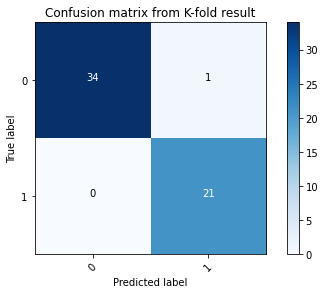

In [21]:
plot_confusion_matrix(mlp_predict, y_test)

In [22]:
print('MLP Accuracy: {:.2f}%'.format(accuracy_score(y_test, mlp_predict) * 100))
print('MLP Classification report:\n\n', classification_report(y_test, mlp_predict))
print('MLP Training set score: {:.2f}%'.format(mlp.score(X_train, y_train) * 100))
print('MLP Testing set score: {:.2f}%'.format(mlp.score(X_test, y_test) * 100))

MLP Accuracy: 98.21%
MLP Classification report:

               precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.95      1.00      0.98        21

    accuracy                           0.98        56
   macro avg       0.98      0.99      0.98        56
weighted avg       0.98      0.98      0.98        56

MLP Training set score: 98.64%
MLP Testing set score: 98.21%
